In [88]:
import pandas as pd
import seaborn as sns
import datetime
import ladybug

%matplotlib inline

In [77]:

def get_datetime(row):
    return datetime.datetime(year=2017, month=row['Month'], day=row['Day'], hour=row['Hour']-1)

def get_doy(row):
    monthDays = [0, 31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
    return sum(monthDays[:row['Month']]) + row['Day']


def epw_to_df(epw_path, skiprows=8):
    df = pd.read_csv(epw_path, skiprows=skiprows, header=None)
    df = df.reset_index()

    # df = df.iloc[:, :37]
    epw_columns = ['Index',
                   'Year',
                    'Month',
                    'Day',
                    'Hour',
                    'Minute',
                    'Remove',
                    'Dry_Bulb_Temperature',
                    'Dew_Point_Temperature',
                    'Relative_Humidity',
                    'Atmospheric_Station_Pressure',
                    'Extraterrestrial_Horizontal_Radiation',
                    'Extraterrestrial_Direct_Normal_Radiation',
                    'Horizontal_Infrared_Radiation_Intensity',
                    'Global_Horizontal_Radiation',
                    'Direct_Normal_Radiation',
                    'Diffuse_Horizontal_Radiation',
                    'Global_Horizontal_Illuminance',
                    'Direct_Normal_Illuminance',
                    'Diffuse_Horizontal_Illuminance',
                    'Zenith_Luminance',
                    'Wind_Direction',
                    'Wind_Speed',
                    'Total_Sky_Cover',
                    'Opaque_Sky_Cover',
                    'Visibility',
                    'Ceiling_Height',
                    'Present_Weather_Observation',
                    'Present_Weather_Codes',
                    'Precipitable_Water',
                    'Aerosol_Optical_Depth',
                    'Snow_Depth',
                    'Days_Since_Last_Snowfall',
                    'Albedo',
                    'Liquid_Precipitation_Depth',
                    'Liquid_Precipitation_Quantity']

    df.columns = epw_columns
    df['datetime'] = df.apply(lambda row: get_datetime(row), axis=1)
    df['doy'] = df.apply(lambda row: get_doy(row), axis=1)

    return df


In [96]:
epw_path = 'urban_heat_island/ESP_Malaga.084820_SWEC.epw'

df = epw_to_df(epw_path)

df.head()

,Index,Year,Month,Day,Hour,Minute,Remove,Dry_Bulb_Temperature,Dew_Point_Temperature,Relative_Humidity,...,Present_Weather_Codes,Precipitable_Water,Aerosol_Optical_Depth,Snow_Depth,Days_Since_Last_Snowfall,Albedo,Liquid_Precipitation_Depth,Liquid_Precipitation_Quantity,datetime,doy
0,0,1989,1,1,1,60,*?*?*?*?*?*?*?*?*?*?*?*?*?*?*?*?*?*?*?*?*?*?,13.3,8.1,70,...,999999999,0,0.0,0,88,0.0,0.0,0.0,2017-01-01 00:00:00,1
1,1,1989,1,1,2,60,*?*?*?*?*?*?*?*?*?*?*?*?*?*?*?*?*?*?*?*?*?*?,13.3,8.1,70,...,999999999,0,0.0,0,88,0.0,0.0,0.0,2017-01-01 01:00:00,1
2,2,1989,1,1,3,60,*?*?*?*?*?*?*?*?*?*?*?*?*?*?*?*?*?*?*?*?*?*?,12.8,8.1,73,...,999999999,0,0.0,0,88,0.0,0.0,0.0,2017-01-01 02:00:00,1
3,3,1989,1,1,4,60,*?*?*?*?*?*?*?*?*?*?*?*?*?*?*?*?*?*?*?*?*?*?,12.8,8.1,73,...,999999999,0,0.0,0,88,0.0,0.0,0.0,2017-01-01 03:00:00,1
4,4,1989,1,1,5,60,*?*?*?*?*?*?*?*?*?*?*?*?*?*?*?*?*?*?*?*?*?*?,12.2,8.3,77,...,999999999,0,0.0,0,88,0.0,0.0,0.0,2017-01-01 04:00:00,1


In [79]:
import datetime

def get_datetime(row):
    return datetime.datetime(year=2017, month=row['Month'], day=row['Day'], hour=row['Hour']-1)

def get_doy(row):
    monthDays = [0, 31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
    return sum(monthDays[:row['Month']]) + row['Day']

df['datetime'] = df.apply(lambda row: get_datetime(row), axis=1)
df['doy'] = df.apply(lambda row: get_doy(row), axis=1)

df.head()

,Index,Year,Month,Day,Hour,Minute,Remove,Dry_Bulb_Temperature,Dew_Point_Temperature,Relative_Humidity,...,Present_Weather_Codes,Precipitable_Water,Aerosol_Optical_Depth,Snow_Depth,Days_Since_Last_Snowfall,Albedo,Liquid_Precipitation_Depth,Liquid_Precipitation_Quantity,datetime,doy
0,0,1989,1,1,1,60,*?*?*?*?*?*?*?*?*?*?*?*?*?*?*?*?*?*?*?*?*?*?,13.3,8.1,70,...,999999999,0,0.0,0,88,0.0,0.0,0.0,2017-01-01 00:00:00,1
1,1,1989,1,1,2,60,*?*?*?*?*?*?*?*?*?*?*?*?*?*?*?*?*?*?*?*?*?*?,13.3,8.1,70,...,999999999,0,0.0,0,88,0.0,0.0,0.0,2017-01-01 01:00:00,1
2,2,1989,1,1,3,60,*?*?*?*?*?*?*?*?*?*?*?*?*?*?*?*?*?*?*?*?*?*?,12.8,8.1,73,...,999999999,0,0.0,0,88,0.0,0.0,0.0,2017-01-01 02:00:00,1
3,3,1989,1,1,4,60,*?*?*?*?*?*?*?*?*?*?*?*?*?*?*?*?*?*?*?*?*?*?,12.8,8.1,73,...,999999999,0,0.0,0,88,0.0,0.0,0.0,2017-01-01 03:00:00,1
4,4,1989,1,1,5,60,*?*?*?*?*?*?*?*?*?*?*?*?*?*?*?*?*?*?*?*?*?*?,12.2,8.3,77,...,999999999,0,0.0,0,88,0.0,0.0,0.0,2017-01-01 04:00:00,1


In [80]:
def heatmap_matrix(value):
    hm = df.pivot(index='Hour', columns='doy')[value]
    hm = hm.reindex(index=hm.index[::-1])
    return hm

cmap = sns.color_palette("hls", 8)

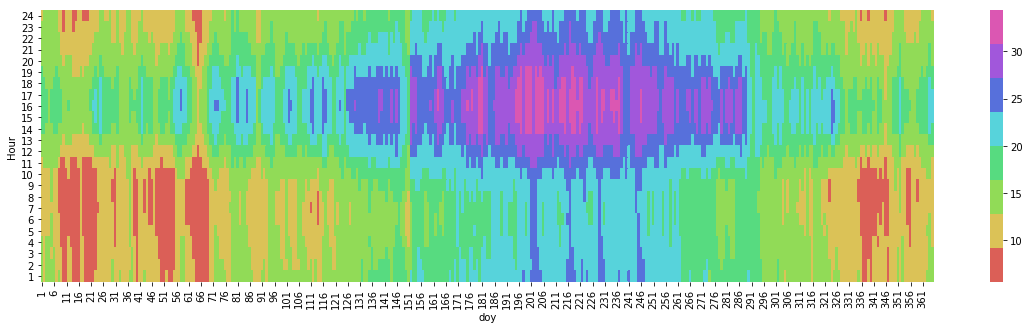

In [81]:
import matplotlib.pyplot as plt

plt.figure(figsize = (20,5))

ax = sns.heatmap(heatmap_matrix('Dry_Bulb_Temperature'), cmap=cmap)

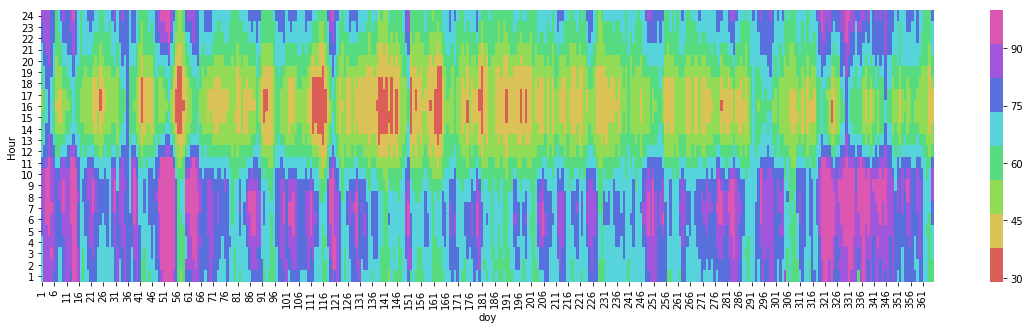

In [82]:
plt.figure(figsize = (20,5))

ax = sns.heatmap(heatmap_matrix('Relative_Humidity'), cmap= cmap)

In [94]:
epw_path = 'urban_heat_island/ESP_Malaga.084820_SWEC.epw'
new_epw_path = 'urban_heat_island/uwg_epws/0_baseline.epw'

epw_path = 'urban_heat_island/ESP_MALAGA-AP_084820_IW2.epw'
new_epw_path = 'urban_heat_island/ESP_MALAGA-AP_084820_IW2_URBAN.epw'

# df_new = epw_to_df(new_epw_path)
# df_original = epw_to_df(epw_path)

In [95]:
from ladybug.epw import EPW

epw = EPW(epw_path)
epw._import_data()


In [93]:
epw_urban = EPW(new_epw_path)
epw_urban._import_data()

ValueError: invalid literal for int() with base 10: 'HOLIDAYS/DAYLIGHT SAVINGS'

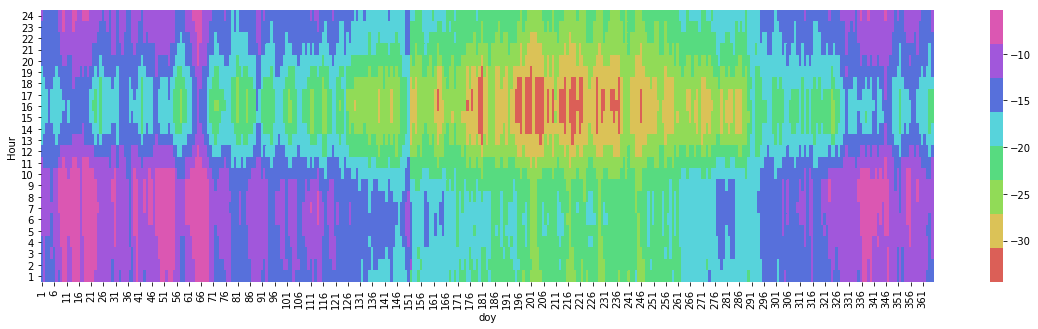

In [56]:
value = 'Dry_Bulb_Temperature'
# value = 'Dew_Point_Temperature'
# value = 'Relative_Humidity'
# value = 'Wind_Speed'
# value = 'Dew_Point_Temperature'

diff = df_new

diff[value] = df_new[value] - df_original[value]

diff = diff.pivot(index='Hour', columns='doy')[value]
diff = diff.reindex(index=diff.index[::-1])

plt.figure(figsize = (20,5))


ax = sns.heatmap(diff, cmap= cmap)

In [27]:
import os

data_dir = 'urban_heat_island/uwg_epws/'

df_list = []

for file_name in os.listdir(data_dir):
    iter_df = epw_to_df(os.path.join(data_dir, file_name))
    iter_df['name'] = ' '.join(file_name.split('_')[1:]).split('.')[0]
    iter_df['improvement step'] = file_name.split('_')[0]
    df_list.append(iter_df)
    
df_total = pd.concat(df_list)

df_total.shape

(43800, 39)

In [37]:
value = 'Dry_Bulb_Temperature'
# value = 'Dew_Point_Temperature'
# value = 'Relative_Humidity'
# value = 'Wind_Speed'
# value = 'Dew_Point_Temperature'

hms = df_total.pivot_table(index=['Hour', 'improvement step', 'name'], columns='doy')[value]
hms = hms.reindex(index=hms.index[::-1])

# hms = hms.reset_index()

hms.head(n=20)

doy                                                             1     2    \
Hour improvement step name                                                  
24   4                upgrade building fabric and consumption  12.5  13.5   
     3                10 percent trees                         12.5  13.5   
     2                30 percent grass                         12.5  13.5   
     1                half traffic                             12.5  13.5   
     0                baseline                                 12.6  13.5   
23   4                upgrade building fabric and consumption  13.5  14.0   
     3                10 percent trees                         13.5  14.0   
     2                30 percent grass                         13.5  14.0   
     1                half traffic                             13.5  14.0   
     0                baseline                                 13.5  14.0   
22   4                upgrade building fabric and consumption  14.1  14.1   
     3                10 percent trees                         14.1  14.1   
     2                30 percent grass                         14.1  14.1   
     1                half traffic                             14.1  14.1   
     0                baseline                                 14.1  14.1   
21   4                upgrade building fabric and consumption  14.8  14.6   
     3                10 percent trees                         14.8  14.6   
     2                30 percent grass                         14.8  14.6   
     1                half traffic                             14.8  14.6   
     0                baseline                                 14.8  14.6   

doy                                                             3     4    \
Hour improvement step name                                                  
24   4                upgrade building fabric and consumption  13.5  13.4   
     3                10 percent trees                         13.5  13.4   
     2                30 percent grass                         13.5  13.4   
     1                half traffic                             13.5  13.4   
     0                baseline                                 13.5  13.4   
23   4                upgrade building fabric and consumption  14.0  13.4   
     3                10 percent trees                         14.1  13.4   
     2                30 percent grass                         14.1  13.4   
     1                half traffic                             14.1  13.4   
     0                baseline                                 14.1  13.4   
22   4                upgrade building fabric and consumption  14.5  13.5   
     3                10 percent trees                         14.5  13.5   
     2                30 percent grass                         14.5  13.5   
     1                half traffic                             14.5  13.5   
     0                baseline                                 14.5  13.5   
21   4                upgrade building fabric and consumption  14.6  14.1   
     3                10 percent trees                         14.6  14.1   
     2                30 percent grass                         14.6  14.1   
     1                half traffic                             14.6  14.1   
     0                baseline                                 14.6  14.1   

doy                                                             5     6    \
Hour improvement step name                                                  
24   4                upgrade building fabric and consumption  14.0  13.0   
     3                10 percent trees                         14.0  13.0   
     2                30 percent grass                         14.0  13.0   
     1                half traffic                             14.0  13.0   
     0                baseline                                 14.0  13.0   
23   4                upgrade building fabric and consumption  14.0  13

In [ ]:

importimport  matplotlib.pyplotmatplotl  as plt
import matplotlib
import matplotlib.lines as lines

mdf = monthly_average[monthly_average['month'] == month]

fig, ax = plt.subplots(3, 4, figsize=(20,15), sharex='col', sharey='row')

def add_lines(ax, line_list):
    ls = []
    for line in line_list:
        ax.plot(line[0], line[1], '-k')

# axes are in a two-dimensional array, indexed by [row, col]
hour = 7
for i in range(3):
    for j in range(4):
        hour+=1
        subdf = mdf[mdf['hour'] == hour]
        
        im = ax[i,j].scatter(subdf['x'], subdf['y'], alpha = .8, c = subdf['kWh'], cmap = 'viridis', vmin=0, vmax=0.3)
        ax[i,j].set_yticklabels([])
        ax[i,j].set_xticklabels([])
        ax[i,j].set_title('{}:00'.format(hour))
        add_lines(ax[i,j], line_list)

fig.colorbar(im, ax=ax)
fig.suptitle('Hourly Radiation for the month of {}'.format(month))
fig.savefig('test.png')